In [1]:
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
from multiprocessing import Pool
from bandit import DisjointLinearBandit
from policies import *
from utils import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

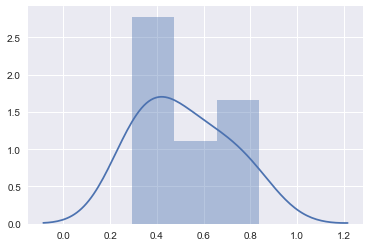

In [2]:
dlb = DisjointLinearBandit(d=3,
                           K=10,
                           loc=0,
                           scale=1
                          )
n_plays = 10000
sns.distplot(dlb.get_mean())

In [3]:
dlb.get_mean()

array([ 0.29460182,  0.59280998,  0.65655032,  0.33353833,  0.42985703,
        0.74421135,  0.503553  ,  0.29485522,  0.83519495,  0.4401386 ])

In [4]:
rewards ={}
delta = 0.75 # small delta -> tight bound on regret
alpha = 1 + np.sqrt(0.5 * np.log(2 / delta))
#alpha = 1e10
path, rewards["lin_ucb"], theta = lin_ucb_disjoint_policy(dlb,
                                               n_plays,
                                               alpha=alpha,
                                               play_all_first=True)
print(alpha)

1.70029609917


In [5]:
Counter(path)

Counter({0: 2, 1: 3999, 2: 171, 3: 2, 4: 3, 5: 5, 6: 2, 7: 2, 8: 5811, 9: 3})

In [6]:
regret(dlb, path)

0.10065302663332309

In [7]:
np.mean(dlb.get_mean()[path])

0.73454191912660083

In [8]:
max(dlb.get_mean())

0.83519494575992392

In [9]:
np.mean(rewards["lin_ucb"])

0.69610000000000005

How close did we estimate the parameters?

(-5, 5)

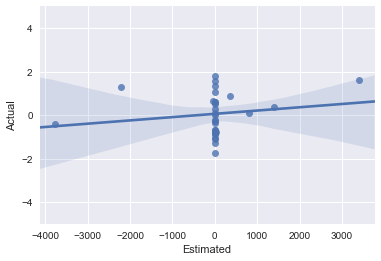

In [10]:
sns.regplot(y=np.ravel(dlb.get_parameters()),
            x=np.ravel(theta))
plt.xlabel("Estimated")
plt.ylabel("Actual")
plt.ylim(np.array([-1, 1]) * 5)

In [11]:
# ignoring context
outcomes, path, rewards["ucb1"] = ucb1_policy(dlb, n_plays)

In [12]:
np.mean(rewards["ucb1"])

0.75109999999999999

In [13]:
Counter(path)

Counter({0: 69,
         1: 231,
         2: 463,
         3: 89,
         4: 111,
         5: 526,
         6: 114,
         7: 108,
         8: 8187,
         9: 102})

(20, 10000)

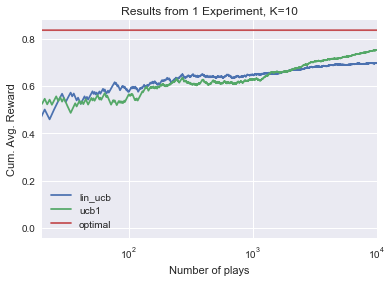

In [14]:
optimal = [max(dlb.get_mean())] * n_plays
for policy in rewards:
    plt.plot(cummean(rewards[policy]),
             label=policy)
plt.plot(cummean(optimal),
         label="optimal")
plt.xlabel("Number of plays")
plt.ylabel("Cum. Avg. Reward")
plt.legend()
plt.title("Results from 1 Experiment, K=%d" % dlb.get_K())
plt.xscale("log")
plt.xlim((dlb.get_K() * 2, n_plays))